#Lecture 08 - Support Vector Machines

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

![alt text](https://i.vas3k.ru/7w4.jpg)

## <img src="https://img.icons8.com/color/32/000000/fork-lift.png"/> Load packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### <img src="https://img.icons8.com/color/24/000000/cosine.png"/> Helper function for graphing our results

In [0]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## <img src="https://img.icons8.com/color/32/000000/accept-database.png"/> Prepare a dataset

# <img src="https://img.icons8.com/color/32/000000/presentation.png"/> Visualize the data

### <img src="https://img.icons8.com/color/32/000000/database-restore.png"/>  Load the data

Load the Iris dataset from scikit-learn. 

In [0]:
# load the data
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]


### <img src="https://img.icons8.com/color/32/000000/search-property.png"/>  Examine the data

The classes are integer labels where 
* 0=Iris-Setosa
* 1=Iris-Versicolor
* 2=Iris-Virginica.

In [0]:
# examine data shapes
X = iris.data
print('X shape', X.shape)
y = iris.target
print('y shape', y.shape)
print('Class labels:', np.unique(y))

X shape (150, 4)
y shape (150,)
Class labels: [0 1 2]


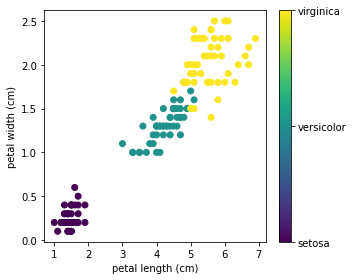

In [0]:
# plot two features against each other
x_index = 2   # petal length
y_index = 3   # petal width

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### <img src="https://img.icons8.com/color/32/000000/hashtag-activity-feed-2.png"/>  Get attributes and class labels

In [0]:
# Consider only the third column of the petal length, and 
# the fourth column of petal width of the flower. 
X = iris.data[:, [2, 3]]
y = iris.target

### <img src="https://img.icons8.com/color/32/000000/split-files.png"/> Split into train and test sets

In this example, 70% is for training and 30% is for testing.

In [0]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### <img src="https://img.icons8.com/color/32/000000/compare.png"/> Standardize the features

In [0]:
# standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# needed for graphing
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# <img src="https://img.icons8.com/color/32/000000/split-files.png"/> Support Vector Machines

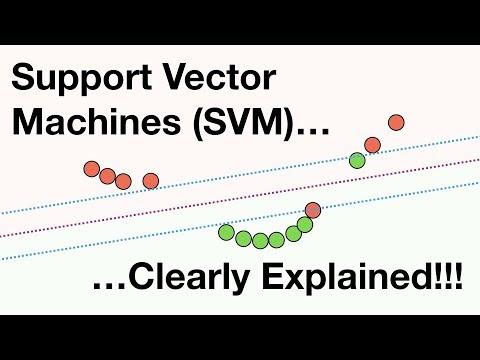

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('efR1C6CvhmE')

## <img src="https://img.icons8.com/color/32/000000/width.png"/>  Maximum margin classification

Decision boundaries with large margins tend to have a lower generalization error. Here are the positive and negative hyperplanes that are parallel to the decision boundary:

$$w_0 + \mathbf{w}^T\mathbf{x_{pos}} = 1$$
$$w_0 + \mathbf{w}^T\mathbf{x_{neg}} = -1$$



If we substract those two linear equations, we get:

$$ \Rightarrow \lvert \lvert \mathbf{w} \rvert \rvert \ (\mathbf{x_{pos}} - \mathbf{x_{neg}}) = 2 $$


We normalize this equation by the length of the vector $\mathbf{w}$, which is:

$$ \lvert \lvert \mathbf{w} \rvert \rvert = \sqrt{\sum_{j=1}^m w_j^2}  $$

The left side of the following equation is interpreted as the distance between the positive and negative hyperplane.  It is the margin we want to maximize.

$$  {{\mathbf{w}^T (\mathbf{x_{pos}} - \mathbf{x_{neg}})} \over {\lvert \lvert \mathbf{w} \rvert \rvert}} = {2\over{\lvert \lvert \mathbf{w} \rvert \rvert}}$$ 

<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch03/images/03_09.png width="1000">

The objective function of the SVM maximizes this margin by maximizing $2\over{\lvert \lvert \mathbf{w} \rvert \rvert}$, under the constraint that the examples are classified correctly.

$$w_0 + \mathbf{w}^T\mathbf{x^i} \ge 1 \quad \text{if} \ y^i = 1 $$ 
$$w_0 + \mathbf{w}^T\mathbf{x^i} \le -1 \quad \text{if} \ y^i = -1 $$ 
$$\text{for} \ i = 1 \ldots N$$
where $N$ is the number of examples in the dataset.

In practice it is easier to minimize the reciprocal term ${1\over2} {\lvert \lvert \mathbf{w} \rvert \rvert}^2$ which can be done with quadratic programming.

##<img src="https://img.icons8.com/color/32/000000/change.png"/> Using slack variables

For the soft-margin classification ([Vapnik 1995](http://sun.aei.polsl.pl/~mkawulok/stud/rtisb/wyklad/11.pdf)), the positive-valued slack variable is simply added to the linear constraints.
$$w_0 + \mathbf{w}^T\mathbf{x^i} \ge 1 - \xi^i \quad  \text{if} \ y^i = 1 $$
$$w_0 + \mathbf{w}^T\mathbf{x^i} \le -1 + \xi^i \quad \text{if} \ y^i = -1 $$
$$\text{for} \ i = 1 \ldots N$$

The new objective to be minimized, subject to the constraints, becomes:
$$ {1\over2} {\lvert \lvert \mathbf{w} \rvert \rvert}^2 + C\ (\ \sum_i \xi^i\ ) $$

Via the variable $C$ we can control the penalty for misclassification. Large values of $C$ correspond to large error penalties, whereas a small value of $C$ is less strict about misclassification errors. 

<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch03/images/03_10.png width="1000">

## <img src="https://img.icons8.com/color/32/000000/term.png"/> Implementation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


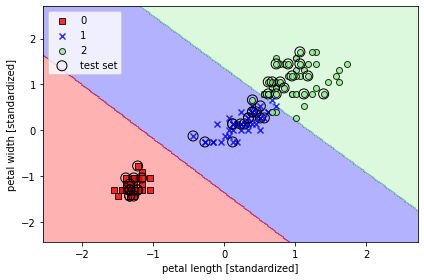

In [0]:
# train SVC model
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## <img src="https://img.icons8.com/color/32/000000/new-document.png"/>  Another Implementation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


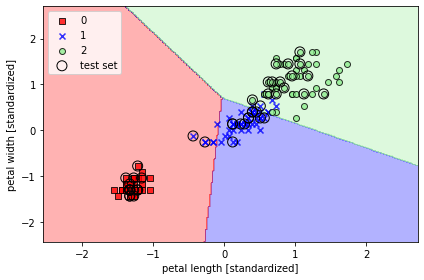

In [0]:
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# <img src="https://img.icons8.com/color/32/000000/sine.png"/> Kernel methods for non-linear problems

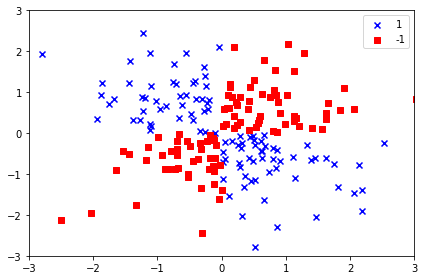

In [0]:
# generate XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## <img src="https://img.icons8.com/color/32/000000/level-up.png"/> Projecting into higher dimensional space

<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch03/images/03_13.png width="1000">

## <img src="https://img.icons8.com/color/32/000000/replace--v1.png"/> Kernel trick


A kernel can be thought as as a similarity function between a pair of examples.  The minus sign inverts the distance measures into a similarity score and, given the exponential term, the result will fall into a range between 1 (same) and 0 (different).

The kernel trick can help find separating hyperplanes in higher dimensional space.

$$\kappa(\mathbf{x}^i, \mathbf{x}^j) = \phi (\mathbf{x}^i)^T \ \phi(\mathbf{x}^j)^T$$

### Gaussian kernel


$$\kappa(\mathbf{x}^i, \mathbf{x}^j) = \exp(- \ {{\lvert \lvert \mathbf{x}^i - \mathbf{x}^j \rvert \rvert } \over 2 \sigma^2 }) $$

### Radial basis function (RBF)

$$\kappa(\mathbf{x}^i, \mathbf{x}^j) = \exp(- \gamma \ {\lvert \lvert \mathbf{x}^i - \mathbf{x}^j \rvert \rvert }^2 \  ) $$

where $\gamma$ is a free parameter to be optimized.

Classify the XOR data with an RBF kernel.

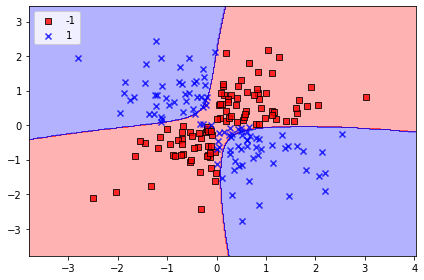

In [0]:
# SVM with RBF kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Examples

### <img src="https://img.icons8.com/color/24/000000/gamma.png"/> Classify Iris dataset with an RBF kernel with small `gamma=0.10`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


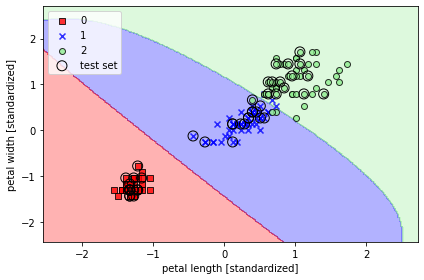

In [0]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

### <img src="https://img.icons8.com/color/48/000000/gamma.png"/> Classify Iris dataset with an RBF kernel with a large `gamma=100`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


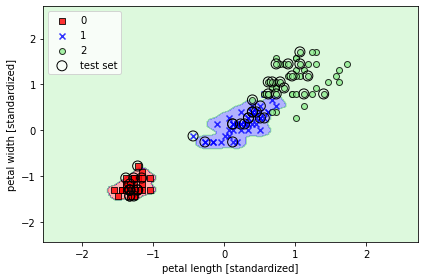

In [0]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()

> Note the tight decision boundary around the classes 0 and 1 using a very large value of $\gamma$.

# <img src="https://img.icons8.com/color/32/000000/thinking-bubble.png"/> Go Deeper

### <img src="https://img.icons8.com/color/32/000000/video.png"/> Polynomial kernel

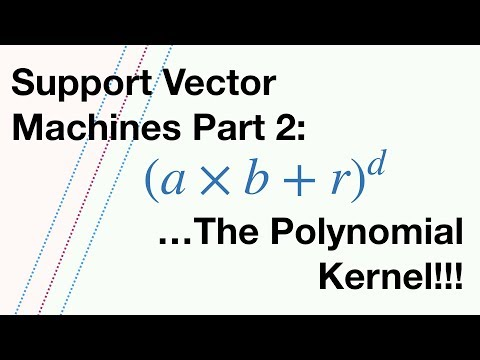

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('Toet3EiSFcM')

### <img src="https://img.icons8.com/color/32/000000/video.png"/> Radial kernel

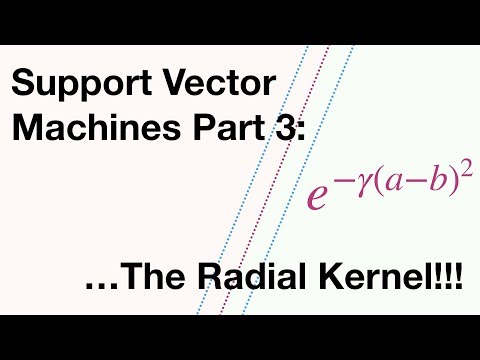

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('Qc5IyLW_hns')